<a href="https://colab.research.google.com/github/bernikrn/deep-learning-practica/blob/main/practicaDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [ ]:
import tensorflow as tf

tf.device("/GPU:0")

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ejucutar esta celda, solo si no existen los ficheros full_train.csv y full_test.csv en drive

# Descarga de datos
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

# Guardado como dataframe

data = pd.read_csv('airbnb-listings.csv', sep = ';')

# Keep only the aparments from Madrid
data = data[data["City"]=="Madrid"]
print(f'Inputs placed in Madrid: {len(data)}')


# List of elements considered to be relevant
# We can see that "Square feet" has less than 4% of values so this column will not be added.

columns_to_keep = ['Price','Accommodates','Bathrooms','Bedrooms','Beds',
                   'Guests Included','Extra People','Review Scores Rating',
                   'Host Response Rate', 'Minimum Nights', 'Maximum Nights',
                   'Availability 30', 'Availability 60', 'Availability 90',
                   'Availability 365', 'Number of Reviews','Thumbnail Url']
data = data[columns_to_keep]


# Train and test separation
train, test = train_test_split(data, test_size=.2, random_state = 1)

print('Datos de entrenamiento: ', train.shape)
print('Datos de test: ', test.shape)

train.to_csv('./full_train.csv', sep=';', index=False)
test.to_csv('./full_test.csv',sep=';', index=False)

# Almacenamos los datos de train y test por separado
!cp full_train.csv /content/drive/My\ Drive/Keepcoding/deep-learning2/full_train.csv
!cp full_test.csv /content/drive/My\ Drive/Keepcoding/deep-learning2/full_test.csv




--2023-02-17 18:18:22--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [           <=>      ]  54.31M  1.09MB/s    in 57s     

2023-02-17 18:19:21 (976 KB/s) - ‘airbnb-listings.csv’ saved [56950929]

Inputs placed in Madrid: 13207
Datos de entrenamiento:  (10565, 17)
Datos de test:  (2642, 17)


In [ ]:
# Read train data from .csv file
data_train = pd.read_csv('/content/drive/MyDrive/Keepcoding/deep-learning2/full_train.csv', sep=';')
data_test = pd.read_csv('/content/drive/MyDrive/Keepcoding/deep-learning2/full_test.csv', sep=';')

In [ ]:
# Check the percentage of missing values for each column
data_train.notnull().mean().mul(100).sort_values(ascending=False)

Availability 365        100.000000
Guests Included         100.000000
Extra People            100.000000
Number of Reviews       100.000000
Accommodates            100.000000
Minimum Nights          100.000000
Maximum Nights          100.000000
Availability 30         100.000000
Availability 60         100.000000
Availability 90         100.000000
Price                    99.943209
Bedrooms                 99.801230
Bathrooms                99.611926
Beds                     99.611926
Host Response Rate       87.288216
Thumbnail Url            81.353526
Review Scores Rating     78.637009
dtype: float64

In [ ]:
# imputation of missing values
def imputation(data):
    data["Price"].fillna(data_train["Price"].mean(), inplace=True)
    data["Bedrooms"].fillna(data_train["Bedrooms"].mode()[0], inplace=True)
    data["Bathrooms"].fillna(data_train["Bathrooms"].mode()[0], inplace=True)
    data["Beds"].fillna(data_train["Beds"].mode()[0], inplace=True)
    data["Host Response Rate"].fillna(data_train["Host Response Rate"].mean(), inplace=True)
    data["Review Scores Rating"].fillna(data_train["Review Scores Rating"].mean(), inplace=True)
    
imputation(data_train)
imputation(data_test)

In [ ]:
from operator import index
import imageio as io
import numpy as np
import cv2

def download_images(n_images, urls):
  """
  Download n_images from urls
  Checks if url is good and image has correct dimentions
  """
  images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
  i_aux = 0
  good_urls = []
  for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        print(f'\n[INFO] {n_images} images were downloaded')
        break
    if i_img % (n_images // 10) == 0:
      print(f'{i_img} images downloaded')
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        #print(f'Image {i_img} downloaded')
        #print(len(good_urls))
    except IOError as err:
        pass
    except ValueError as err:
        print("Value error")
        print(err)
        pass
  return images, good_urls


In [ ]:
# Ejecutar esta celda solo si no existen los archivos .npy en drive

n_images_train = 800
n_images_test = 200

# Download train images and saves them in a file
images_train, good_urls_train = download_images(n_images_train, data_train['Thumbnail Url'])
np.save('images_train.npy', images_train)
!cp images_train.npy /content/drive/My\ Drive/Keepcoding/deep-learning2/images_train.npy

# Trim train data to only the fields that have images and save it in a file
final_data_train = data_train.iloc[good_urls_train, :]
final_data_train.to_csv('./final_data_train.csv', sep=';', index=False)
!cp final_data_train.csv /content/drive/My\ Drive/Keepcoding/deep-learning2/final_data_train.csv


# Download test images and saves them in a file
images_test, good_urls_test = download_images(n_images_test, data_test['Thumbnail Url'])
np.save('images_test.npy', images_test)
!cp images_test.npy /content/drive/My\ Drive/Keepcoding/deep-learning2/images_test.npy

# Trim test data to only the fields that have images and save it in a file
final_data_test = data_test.iloc[good_urls_test, :]
final_data_test.to_csv('./final_data_test.csv', sep=';', index=False)
!cp final_data_test.csv /content/drive/My\ Drive/Keepcoding/deep-learning2/final_data_test.csv



0 images downloaded
80 images downloaded
160 images downloaded
240 images downloaded
320 images downloaded
400 images downloaded
480 images downloaded
560 images downloaded
640 images downloaded
720 images downloaded
800 images downloaded
880 images downloaded
960 images downloaded
1040 images downloaded
1120 images downloaded
1200 images downloaded

[INFO] 800 images were downloaded
0 images downloaded
20 images downloaded
40 images downloaded
60 images downloaded
80 images downloaded
100 images downloaded
120 images downloaded
140 images downloaded
160 images downloaded
180 images downloaded
200 images downloaded
220 images downloaded
240 images downloaded
260 images downloaded
280 images downloaded

[INFO] 200 images were downloaded


# Neural networks

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# run from here if all data is already downloaded

# read images saved in drive
images_train = np.load('/content/drive/MyDrive/Keepcoding/deep-learning2/images_train.npy')
images_test = np.load('/content/drive/MyDrive/Keepcoding/deep-learning2/images_test.npy')

# read reduced datasets saved in drive
final_data_train = pd.read_csv('/content/drive/MyDrive/Keepcoding/deep-learning2/final_data_train.csv', sep=';')
final_data_test = pd.read_csv('/content/drive/MyDrive/Keepcoding/deep-learning2/final_data_test.csv', sep=';')


In [ ]:
x_train = final_data_train.loc[:, (final_data_train.columns != 'Price') & (final_data_train.columns != 'Thumbnail Url')]
y_train = final_data_train[['Price']]

x_test = final_data_test.loc[:, (final_data_test.columns != 'Price') & (final_data_test.columns != 'Thumbnail Url')]
y_test = final_data_test[['Price']]


In [ ]:
import random
import numpy as np
import random

# set sedd for repeatability
seed = 10
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
tf.keras.backend.clear_session()

# 1D neural network

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale input data
scaler_x = MinMaxScaler()
scaler_x.fit(x_train)

x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)

scaler_y = MinMaxScaler()
scaler_y.fit(y_train)

y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)


In [ ]:
from sklearn.model_selection import train_test_split

img_test = images_test

# Dividimos el conjunto de training en training y validation 
x_tr, x_val, y_tr, y_val, img_tr, img_val = train_test_split(x_train, y_train, images_train, test_size=0.15, random_state=42)

print('Train:')
print(f'Shape X: \t{x_tr.shape}')
print(f'Shape images: \t{img_tr.shape}')
print(f'Shape Y: \t{y_tr.shape}')
print('\nValidation:')
print(f'Shape X: \t{x_val.shape}')
print(f'Shape images: \t{img_val.shape}')
print(f'Shape Y: \t{y_val.shape}')
print('\nTest:')
print(f'Shape X: \t{x_test.shape}')
print(f'Shape images: \t{img_test.shape}')
print(f'Shape Y: \t{y_test.shape}')


Train:
Shape X: 	(680, 15)
Shape images: 	(680, 224, 224, 3)
Shape Y: 	(680, 1)

Validation:
Shape X: 	(120, 15)
Shape images: 	(120, 224, 224, 3)
Shape Y: 	(120, 1)

Test:
Shape X: 	(200, 15)
Shape images: 	(200, 224, 224, 3)
Shape Y: 	(200, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam


# Hiper-parámetros de nuestra red
lr = 0.01
n_epochs = 80

input_dim = x_tr.shape[1]

model1 = Sequential()
model1.add(Dense(8, input_dim=input_dim, activation="relu"))
model1.add(Dense(4, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

print("[INFO]: Entrenando red neuronal...")

model1.compile(loss="mse", optimizer=SGD(lr), metrics=["mean_squared_error"]) 
H1 = model1.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=n_epochs, shuffle=True)

[INFO]: Entrenando red neuronal...
Epoch 1/80
22/22 [==============================] - 2s 13ms/step - loss: 0.1618 - mean_squared_error: 0.1618 - val_loss: 0.1500 - val_mean_squared_error: 0.1500
Epoch 2/80
22/22 [==============================] - 0s 4ms/step - loss: 0.1445 - mean_squared_error: 0.1445 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 3/80
22/22 [==============================] - 0s 5ms/step - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 4/80
22/22 [==============================] - 0s 5ms/step - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 5/80
22/22 [==============================] - 0s 4ms/step - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 6/80
22/22 [==============================] - 0s 5ms/step - loss: 0.0641 - mean_squared_error: 0.0641 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoc

In [ ]:
# first: val_mean_squared_error: 0.1500
# last: val_mean_squared_error: 0.0056

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions1 = model1.predict(x_test)

[INFO]: Evaluando red neuronal...
7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, predictions1)
print(f'MSE (test): {mse_test}')

print('Luego de rescaling:')
mse_test = mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(predictions1))
print(f'MSE (test): {mse_test}')
print(f'RMSE (test): {np.sqrt(mse_test)}')

MSE (test): 0.007256807558569345
Luego de rescaling:
MSE (test): 3454.9660357334637
RMSE (test): 58.778959124277314


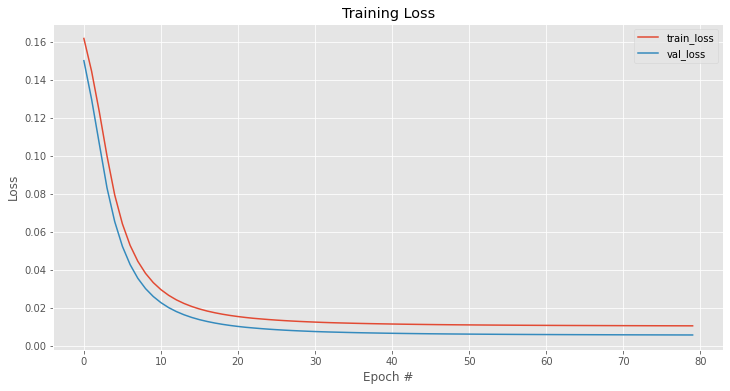

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 6]


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H1.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Convolutional neural network
## Fine tuning VGG16

In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np


img_tr = img_tr / 255
img_val = img_val / 255
img_test = img_test / 255


(-0.5, 223.5, 223.5, -0.5)

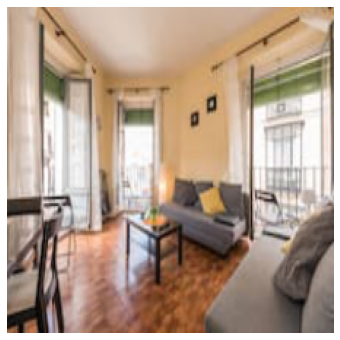

In [ ]:
# Show an example image
plt.imshow(img_test[10])
plt.axis('off')

In [ ]:
# Base model
input_shape = (224, 224, 3)
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model2.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  #print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model2.layers[-1].output
#x = Flatten()(last)
x = GlobalMaxPool2D(name='GlobalMaxPool')(last)
x = Dense(16, activation='relu', name='fc1')(x)
x = Dense(1, activation='linear', name='prediction')(x)

model2 = Model(base_model2.input, x, name='model2')

# compilamos el modelo
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=["mean_squared_error"])

# vemos la nueva estructura del modelo
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

In [ ]:
epochs = 20
batch_size = 128


H2 = model2.fit(img_tr, y_tr, batch_size=batch_size, validation_data=(img_val, y_val), epochs=epochs, shuffle=True)

Epoch 1/20
6/6 [==============================] - 32s 3s/step - loss: 1.1433 - mean_squared_error: 1.1433 - val_loss: 0.2496 - val_mean_squared_error: 0.2496
Epoch 2/20
6/6 [==============================] - 4s 600ms/step - loss: 0.5287 - mean_squared_error: 0.5287 - val_loss: 0.8633 - val_mean_squared_error: 0.8633
Epoch 3/20
6/6 [==============================] - 3s 573ms/step - loss: 0.3040 - mean_squared_error: 0.3040 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 4/20
6/6 [==============================] - 4s 616ms/step - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/20
6/6 [==============================] - 4s 613ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 6/20
6/6 [==============================] - 3s 591ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 7/20
6/6 [==========================

In [ ]:
# first: val_mean_squared_error: 0.2490
# last: val_mean_squared_error: 0.0067

In [ ]:
# comprobamos el accuracy y el loss en el test set
scores = model2.evaluate(img_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
     

7/7 [==============================] - 4s 267ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Test loss: 0.005656067747622728
Test accuracy: 0.005656067747622728


In [ ]:
print("[INFO]: Evaluando red neuronal...")
predictions2 = model2.predict(img_test)

[INFO]: Evaluando red neuronal...
7/7 [==============================] - 1s 116ms/step


In [ ]:
# print some predictions to check if they semm logical
print(scaler_y.inverse_transform(predictions2[0:10]))

[[72.09065 ]
 [61.016224]
 [68.2227  ]
 [68.511696]
 [ 3.311131]
 [43.784733]
 [51.75541 ]
 [81.32888 ]
 [68.20066 ]
 [31.815626]]


In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, predictions2)
print(f'MSE (test): {mse_test}')

print('Luego de rescaling:')
mse_test = mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(predictions2))
print(f'MSE (test): {mse_test}')
print(f'RMSE (test): {np.sqrt(mse_test)}')

MSE (test): 0.005656067906543445
Luego de rescaling:
MSE (test): 2692.8539206512737
RMSE (test): 51.89271548735211


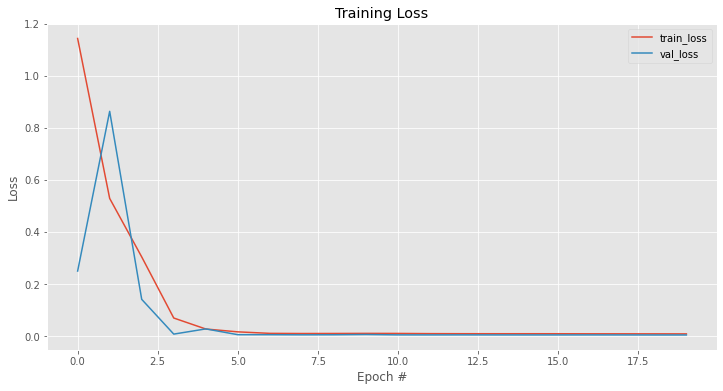

In [ ]:
import matplotlib.pyplot as plt

# Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H2.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Multiple input neural network

In [ ]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalMaxPool2D, Input, concatenate
from tensorflow.keras.optimizers import Adam


# 1D model
input_shape1D = x_tr.shape[1]
input1D = Input(shape=input_shape1D) # 1D NN

x1D = Dense(8, activation="relu")(input1D)
x1D = Dense(4, activation="relu")(x1D)
x1D = Model(inputs=input1D, outputs=x1D)

# CNN model
# Base model
input_shapeCNN = (224, 224, 3)
base_modelCNN = VGG16(weights='imagenet', include_top=False, input_shape=input_shapeCNN)
# frozen layers
for layer in base_model2.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
lastCNN = base_modelCNN.layers[-1].output
#x = Flatten()(last)
xCNN = GlobalMaxPool2D(name='GlobalMaxPool')(lastCNN)
xCNN = Dense(16, activation='relu', name='fc1')(xCNN)
xCNN = Dense(8, activation='relu', name='fc2')(xCNN)
xCNN = Model(inputs=base_modelCNN.input, outputs=xCNN)


combinedNN = concatenate([x1D.output, xCNN.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combinedNN)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
modelCombined = Model(inputs=[x1D.input, xCNN.input], outputs=z, name= 'Multiple_input_model')


In [ ]:
modelCombined.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=["mean_squared_error"])

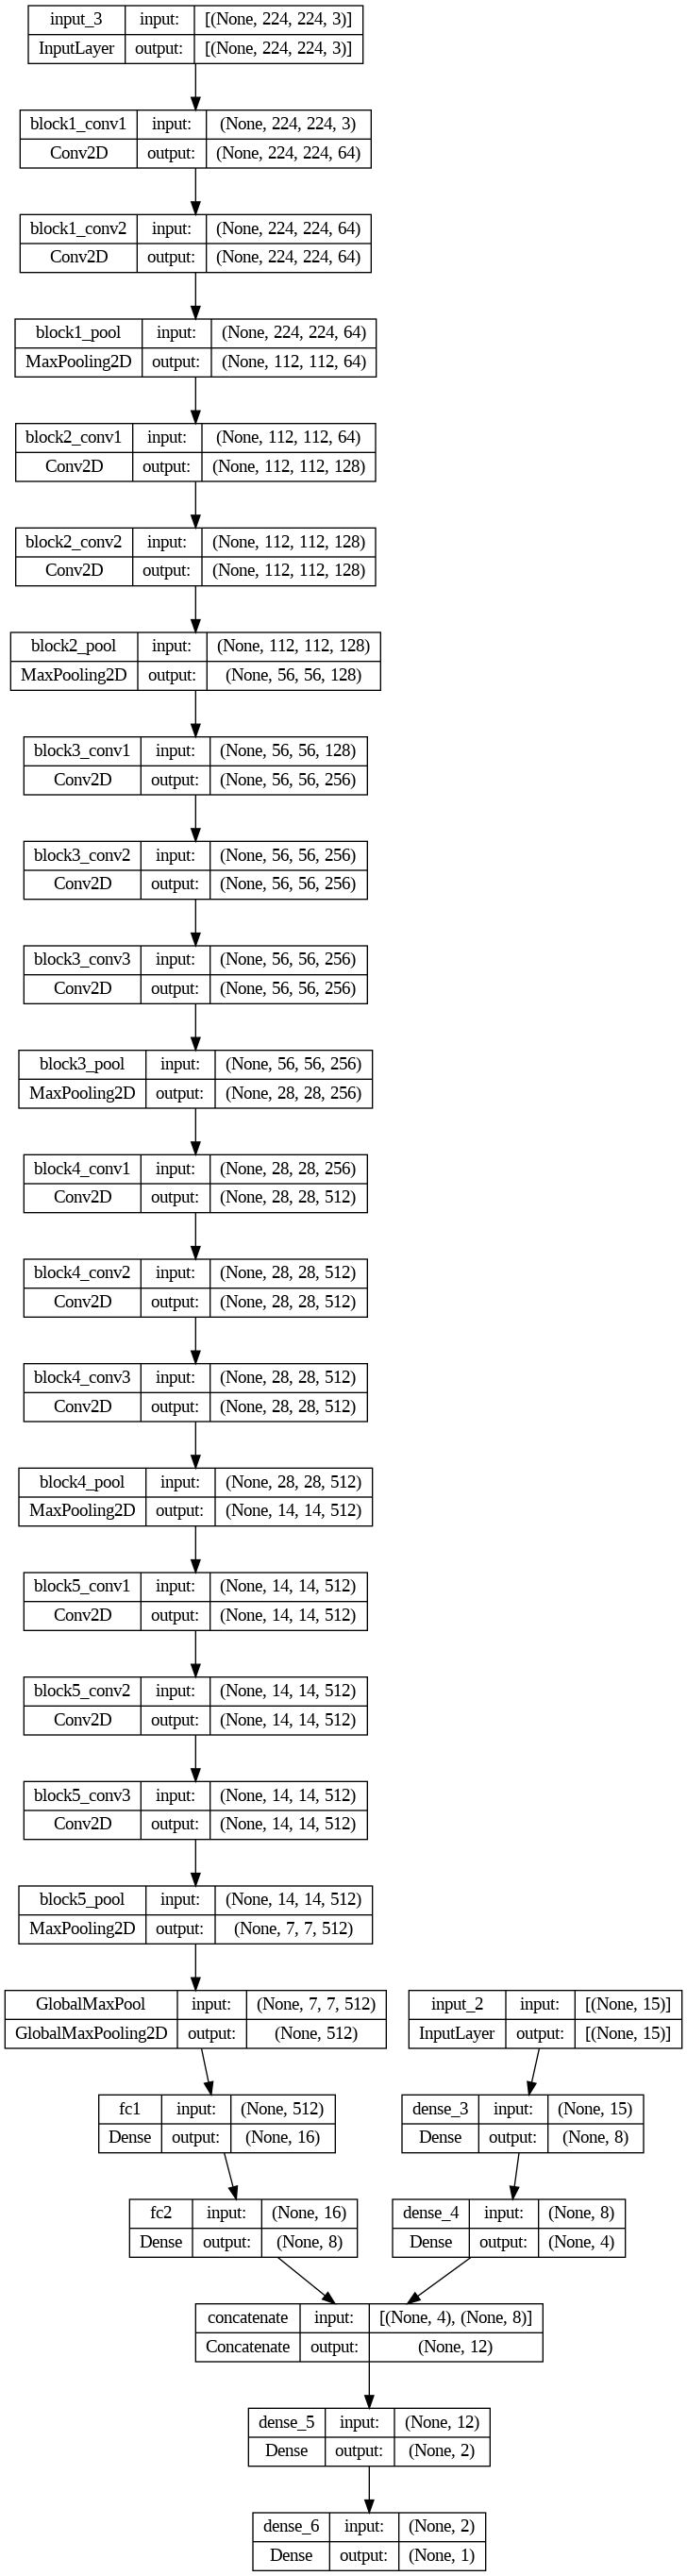

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

# Plot model graph
plot_model(modelCombined, show_shapes=True, show_layer_names=True, to_file='modelCombined.png')
Image(retina=True, filename='modelCombined.png')

In [ ]:
epochs = 20
batch_size = 128

H3 = modelCombined.fit(x = [x_tr, img_tr], 
                       y = y_tr, 
                       batch_size = batch_size,
                       validation_data = ([x_val, img_val], y_val),
                       epochs = epochs,
                       shuffle = True)

Epoch 1/20
6/6 [==============================] - 35s 3s/step - loss: 830.4164 - mean_squared_error: 830.4164 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 2/20
6/6 [==============================] - 9s 1s/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 3/20
6/6 [==============================] - 9s 1s/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/20
6/6 [==============================] - 9s 1s/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 7/20
6/6 [==============================] - 9s 

In [ ]:
print("[INFO]: Evaluando red neuronal...")
predictions3 = modelCombined.predict([x_test, img_test])

[INFO]: Evaluando red neuronal...
7/7 [==============================] - 1s 118ms/step


In [ ]:
# print some predictions to check if they semm logical
print(scaler_y.inverse_transform(predictions3[0:10]))

[[54.054462]
 [36.06747 ]
 [68.866005]
 [49.38941 ]
 [70.76759 ]
 [86.427246]
 [62.012577]
 [59.034904]
 [80.78115 ]
 [93.10447 ]]


In [ ]:
mse_test_combined = mean_squared_error(y_test, predictions3)
print(f'MSE (test): {mse_test_combined}')

print('Luego de rescaling:')
mse_test_combined = mean_squared_error(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(predictions3))
print(f'MSE (test): {mse_test_combined}')
print(f'RMSE (test): {np.sqrt(mse_test_combined)}')

MSE (test): 0.00833997834879158
Luego de rescaling:
MSE (test): 3970.663632107481
RMSE (test): 63.01320204613856


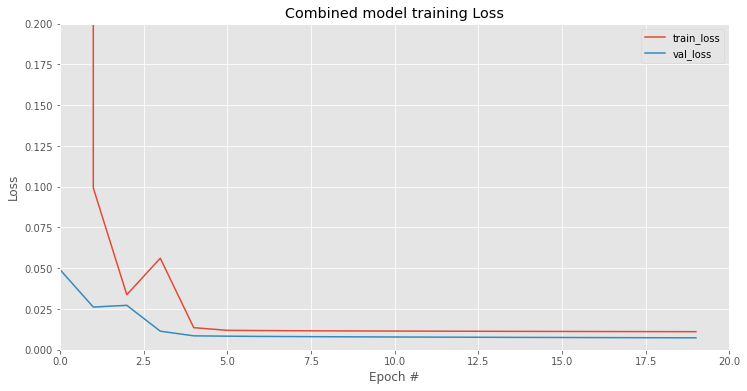

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.xlim(0, epochs)
plt.ylim(0, 0.2)
plt.plot(np.arange(0, epochs), H3.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H3.history["val_loss"], label="val_loss")
plt.title("Combined model training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()